In [2]:
import os
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [87]:
folder = 'prova_E/E8_20PS/'
i = 0
for file in os.listdir(folder):
    i += 1
    if file.startswith('el'):
        print(i)

10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
1022

In [26]:
a = np.load('prova_E/E8_20PS/pos16_0.npy')
a.shape

(116,)

In [27]:
EPS = np.empty((200057, 116, 1), dtype=cp.float64)
labels_EPS = np.zeros(200057)
folder = 'prova_E/E8_20PS/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_EPS[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (116,1))
    EPS[i] = array
    i += 1

In [69]:
EPS[2, 20:].flatten()

array([    0.        , 12065.68277916,  2923.55320056,  2913.48541973,
        6081.28444357,  6209.37662129,  2028.86906809,   392.78941812,
         839.81743183,   417.79117154,   436.27089306,   482.25556815,
        1434.36523722,  1896.70668013,  1414.16484598,  1332.31455097,
        2272.15330092,  2429.50620335,  1765.13214583,  1779.2570032 ,
        2204.09039713,  2127.9838129 ,  2008.02103421,  4163.51319602,
        3316.71761763,  3973.64088416,  4250.73839183,  5368.26348083,
        6110.44375119,  4149.55939718,  7221.94477898,  7664.01661345,
        5670.16644173,  8533.13298513,  7651.79185227,  5715.0074278 ,
        6237.56227868,  7801.528228  ,  7695.76408947,  8677.18358562,
       10287.74488037, 11679.89933246,  9609.68745688,  8137.20969503,
       13803.79899491, 11439.26874807, 11523.30447594,  9288.24326575,
       13825.18365625, 12178.15052371, 14179.21907843, 11429.04172788,
       13733.34607732, 15138.64035999, 16861.89350482, 20384.07798252,
      

<BarContainer object of 96 artists>

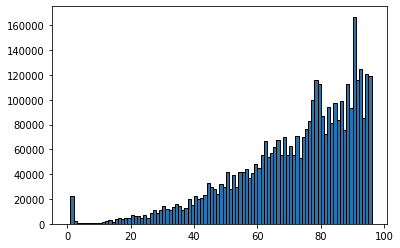

In [79]:
x = np.linspace(0, 96, 97)
plt.bar(x[:-1], EPS[0, 20:].flatten(), width=np.diff(x), ec='black', align='edge')

<BarContainer object of 96 artists>

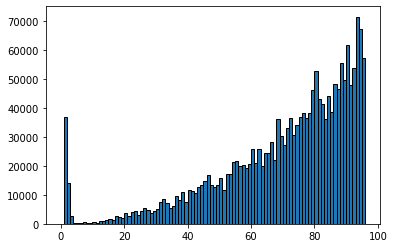

In [80]:
plt.bar(x[:-1], EPS[1, 20:].flatten(), width=np.diff(x), ec='black', align='edge')

<BarContainer object of 96 artists>

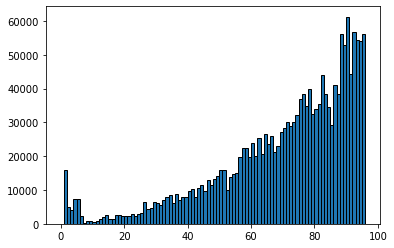

In [88]:
plt.bar(x[:-1], EPS[10057, 20:].flatten(), width=np.diff(x), ec='black', align='edge')

<BarContainer object of 96 artists>

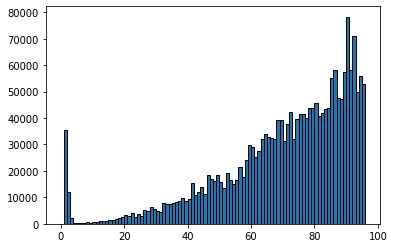

In [89]:
plt.bar(x[:-1], EPS[10058, 20:].flatten(), width=np.diff(x), ec='black', align='edge')

In [31]:
from sklearn.model_selection import train_test_split
E8X_train, E8X_test, E8Y_train, E8Y_test = train_test_split(EPS , labels_EPS ,test_size=0.2)

In [32]:
train1 = E8X_train[:, :20]
train2 = E8X_train[:, 20:]

test1 = E8X_test[:, :20]
test2 = E8X_test[:, 20:]

In [33]:
tran1 = train1/train1.max()
tran2 = train2/train2.max()

In [45]:
test1 = test1/test1.max()
test2 = test2/test2.max()

In [41]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization, Input, Concatenate

# head 1
inputs1 = Input(shape=(20,1))
conv1_1 = Conv1D(filters=32, kernel_size=20, kernel_initializer='he_uniform', padding='same', activation='relu')(inputs1)
pool1_1 = MaxPooling1D(pool_size=2)(conv1_1)
norm1_1 = BatchNormalization()(pool1_1)
conv1_2 = Conv1D(filters=64, kernel_size=20, kernel_initializer='he_uniform', padding='same', activation='relu')(norm1_1)
pool1_2 = MaxPooling1D(pool_size=2)(conv1_2)
norm1_2 = BatchNormalization()(pool1_2)
conv1_3 = Conv1D(filters=128, kernel_size=20, kernel_initializer='he_uniform', padding='same', activation='relu')(norm1_2)
pool1_3 = MaxPooling1D(pool_size=2)(conv1_3)
norm1_3 = BatchNormalization()(pool1_3)
flat1 = Flatten()(norm1_3)
# head 2
inputs2 = Input(shape=(96,1))
conv2_1 = Conv1D(filters=32, kernel_size=20, kernel_initializer='he_uniform', padding='same', activation='relu')(inputs2)
pool2_1 = MaxPooling1D(pool_size=2)(conv2_1)
norm2_1 = BatchNormalization()(pool2_1)
conv2_2 = Conv1D(filters=64, kernel_size=20, kernel_initializer='he_uniform', padding='same', activation='relu')(norm2_1)
pool2_2 = MaxPooling1D(pool_size=2)(conv2_2)
norm2_2 = BatchNormalization()(pool2_2)
conv2_3 = Conv1D(filters=128, kernel_size=20, kernel_initializer='he_uniform', padding='same', activation='relu')(norm2_2)
pool2_3 = MaxPooling1D(pool_size=12)(conv2_3)
norm2_3 = BatchNormalization()(pool2_3)
flat2 = Flatten()(norm2_3)
# merge
merged = Concatenate()([flat1, flat2])
norm = BatchNormalization()(merged)
# interpretation
dense = Dense(128, activation='relu', kernel_initializer='he_uniform')(norm)
dropout = Dropout(0.2)(dense)
outputs = Dense(1, activation='softmax')(dropout)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [42]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 20, 1)        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 96, 1)        0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 20, 32)       672         input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 96, 32)       672         input_6[0][0]                    
____________________________________________________________________________________________

In [43]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [46]:
history = model.fit([train1, train2], E8Y_train, batch_size=64, validation_data=([test1, test2], E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 60s 375us/step - loss: 7.6535 - accuracy: 0.5009 - val_loss: 7.6582 - val_accuracy: 0.4978
Epoch 2/20
160045/160045 [==============================] - 59s 366us/step - loss: 7.6535 - accuracy: 0.5009 - val_loss: 7.6582 - val_accuracy: 0.4978
Epoch 3/20
 39296/160045 [======>.......................] - ETA: 40s - loss: 7.6475 - accuracy: 0.5012

KeyboardInterrupt: 

In [ ]:
summarize_diagnostics(history)

# ---------------------------

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model20 = Sequential()
model20.add(Conv1D(32, , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(96, 1)))
model20.add(MaxPooling1D(2))
model20.add(BatchNormalization())
model20.add(Conv1D(64, 96, activation='relu', kernel_initializer='he_uniform', padding='same'))
model20.add(MaxPooling1D(2))
model20.add(BatchNormalization())
model20.add(Conv1D(128, 96, activation='relu', kernel_initializer='he_uniform', padding='same'))
model20.add(MaxPooling1D(2))
model20.add(BatchNormalization())
model20.add(Flatten())
model20.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model20.add(Dropout(0.5))
model20.add(Dense(1, activation='sigmoid'))

In [59]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model20.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [60]:
history20 = model20.fit(train2, E8Y_train, batch_size=64, validation_data=(test2, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 134s 839us/step - loss: 0.6949 - accuracy: 0.5020 - val_loss: 0.6979 - val_accuracy: 0.5022
Epoch 2/20
 19968/160045 [==>...........................] - ETA: 1:49 - loss: 0.6933 - accuracy: 0.5028

KeyboardInterrupt: 

In [64]:
model2 = Sequential()
#model1.add(Input(shape=(21,1)))
model2.add(Flatten(input_shape=(96,1)))
model2.add(BatchNormalization())
model2.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))

In [65]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [66]:
history2 = model2.fit(train2, E8Y_train, batch_size=64, validation_data=(test2, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 7s 43us/step - loss: 0.6994 - accuracy: 0.5059 - val_loss: 0.6953 - val_accuracy: 0.5022
Epoch 2/20
160045/160045 [==============================] - 6s 35us/step - loss: 0.6941 - accuracy: 0.5091 - val_loss: 0.7103 - val_accuracy: 0.5022
Epoch 3/20
160045/160045 [==============================] - 6s 37us/step - loss: 0.6931 - accuracy: 0.5120 - val_loss: 0.7168 - val_accuracy: 0.5022
Epoch 4/20
160045/160045 [==============================] - 6s 38us/step - loss: 0.6925 - accuracy: 0.5150 - val_loss: 0.7307 - val_accuracy: 0.5022
Epoch 5/20
160045/160045 [==============================] - 6s 38us/step - loss: 0.6921 - accuracy: 0.5160 - val_loss: 0.7137 - val_accuracy: 0.5022
Epoch 6/20
158976/160045 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5203

KeyboardInterrupt: 